In [0]:
import numpy as np

def load_velodyne_points(points_path):
    points = np.fromfile(points_path, dtype=np.float32).reshape(-1, 4)
    points = points[:,:3]                # exclude reflectance values, becomes [X Y Z]
    points = points[0::5,:]              # remove every 5th point for display speed (optional)
    points = points[(points[:,0] > 5)]   # remove all points behind image plane (approximate)
    return points
    
if __name__ == '__main__':
    points = load_velodyne_points('lidar-points.bin')
    print (points.shape)

(6951, 3)


In [0]:
import cv2
import matplotlib.pyplot as plt
im=cv2.imread('image.png')
print(im.shape)

(375, 1242, 3)


In [0]:
points=load_velodyne_points('lidar-points.bin')
im=cv2.imread('image.png')
R=np.array([[0,-1,0],[0,0,-1],[1,0,0]])      #rotation matrix
t=np.array([[.06],[-.08],[-.27]])            # translation matrix
h=np.hstack((R,t))                           # stacked [R | t] 3*4 matrix
points=np.hstack((points,np.ones((6951,1))))       #converting points to homogenous format
K=np.array([[7.215377e+02, 0.000000e+00, 6.095593e+02],
   [0.000000e+00, 7.215377e+02, 1.728540e+02],
   [0.000000e+00, 0.000000e+00, 1.000000e+00]])

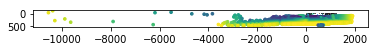

In [0]:
imPoints=h.dot(points.T)        # transforming points from world frame to camera frame
imPoints=K.dot(imPoints)        # projecting points to image plane
imPoints=imPoints/imPoints[2,:] 
plt.imshow(im)
plt.scatter(imPoints[0,:],imPoints[1,:],c=1/points[:,0],s=7)
plt.show()

# Description:

First we found $R_{3*3}$ and $t_{3*1}$ matrix from the given data and concatinated them to form $[R | t]_{3*4}$ matrix.

Then, we converted given points to homogenous co-ordinates. 

We, then transformed the given points from world frame $W$ to camera frame $C$ by multiplying with $[R | t]$ and then projected to image plane by multiplying $K$.

$x_{image-coordinates}$ = $K[R|t]X_{world-coordinates}$


